Statistics assingment

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import math as m
from statsmodels.stats.weightstats import ztest
import scipy.stats as stats
from scipy.stats import chi2
from scipy.stats import norm
from scipy import stats

In [2]:
""" 1. Generate a list o> 100 integers containing values between 90 to 130 and store it in the variable `int_list`. 
After generating the list, find the following"""

int_list = np.random.randint(90,130,100)
weights = np.random.rand(100)

# (i) Mean
def calculate_mean(numbers):
    return np.mean(numbers)

print("Mean:", calculate_mean(int_list))

# (i) Median
def calculate_median(numbers):
    return np.median(numbers)

print("Median:", calculate_median(int_list))

# (ii) Mode
def calculate_mode(numbers):
    mode_result = st.mode(numbers)
    return mode_result

print("Mode:", calculate_mode(int_list))

# (iii) Weighted Mean
def calculate_weighted_mean(values, weights):
    return np.average(values, weights=weights)

print("Weighted Mean:", calculate_weighted_mean(int_list, weights))

# (iv) Geometric Mean
def calculate_geometric_mean(numbers):
    return stats.gmean(numbers)

print("Geometric Mean:", calculate_geometric_mean(int_list))

# (v) Harmonic Mean
def calculate_harmonic_mean(numbers):
    return stats.hmean(numbers)

print("Harmonic Mean:", calculate_harmonic_mean(int_list))

# (vi) Midrange
def calculate_midrange(numbers):
    return (np.min(numbers) + np.max(numbers)) / 2

print("Midrange:", calculate_midrange(int_list))

# (vii) Trimmed Mean
def calculate_trimmed_mean(numbers, proportion_to_cut):
    return stats.trim_mean(numbers, proportion_to_cut)

print("Trimmed Mean (10%):", calculate_trimmed_mean(int_list, 0.1))


Mean: 108.23
Median: 107.5
Mode: 92
Weighted Mean: 109.04907257252108
Geometric Mean: 107.56035249101814
Harmonic Mean: 106.89534133630318
Midrange: 109.5
Trimmed Mean (10%): 108.0125


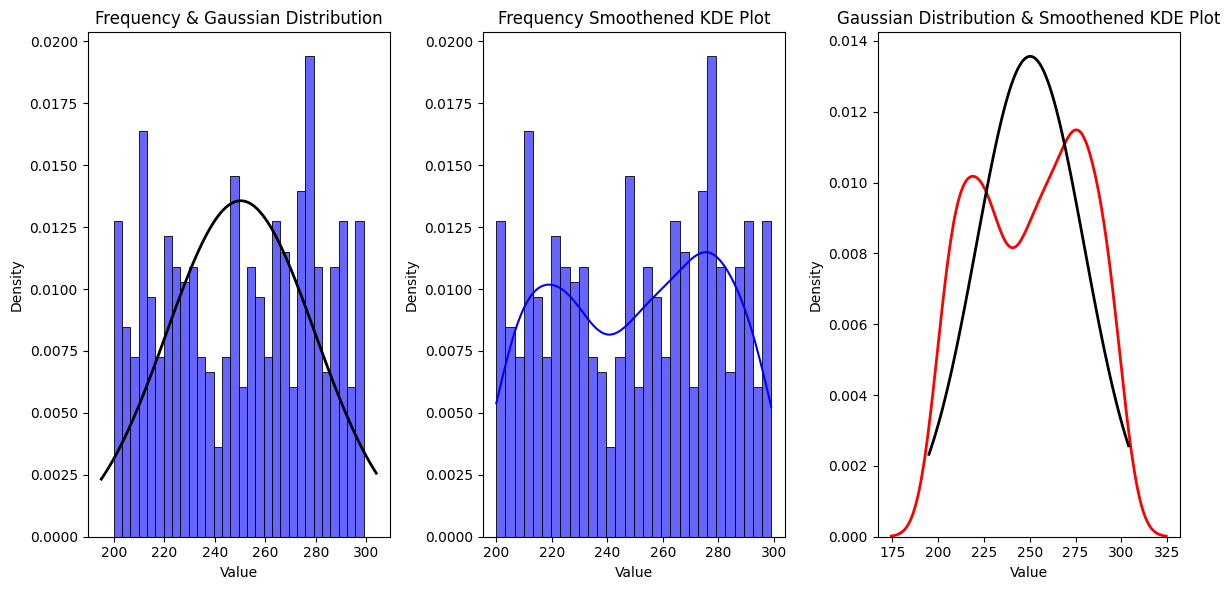

In [3]:
"""2. Generate a list o> 500 integers containing values between 200 to 300 and store it in the variable `int_list2`. 
After generating the list, find the following"""

int_list2 = np.random.randint(200,300,500)

mean = np.mean(int_list2)
std_dev = np.std(int_list2)

# Frequency & Gaussian Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(int_list2, kde=False, stat="density", bins=30, color='blue', alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Frequency & Gaussian Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

# Frequency smoothened KDE plot
plt.subplot(1, 3, 2)
sns.histplot(int_list2, kde=True, stat="density", bins=30, color='blue', alpha=0.6)
plt.title('Frequency Smoothened KDE Plot')
plt.xlabel('Value')
plt.ylabel('Density')

# Gaussian distribution & smoothened KDE plot
plt.subplot(1, 3, 3)
sns.kdeplot(int_list2, color='red', linewidth=2)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Gaussian Distribution & Smoothened KDE Plot')
plt.xlabel('Value')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [4]:
# calculate the range
def calculate_range(data):
    return max(data) - min(data)

print("the range is:",calculate_range(int_list2))

# the variance and standard deviation 
var = np.var(int_list2)
std = np.std(int_list2)
print(f"the variance value is: {var}\n the standard deviation :",std)

# the interquartile range
def compute_iqr(data):
    data_sorted = np.sort(data)
    q1 = np.percentile(data_sorted, 25)
    q3 = np.percentile(data_sorted, 75)

    iqr = q3 - q1
    return iqr

print("the interquartile range is :",compute_iqr(int_list2))

#the coefficient of variation
def calculate_cv(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    
    cv = (std_dev / mean) * 100
    return cv

print("the coefficient of variation is :",calculate_cv(int_list2))

# the mean absolute deviation
def calculate_mad(data):
    mean = np.mean(data)
    abs_deviations = [abs(x - mean) for x in data]
    mad = np.mean(abs_deviations)
    return mad

print(" the mean absolute deviation value is :",calculate_mad(int_list2))

#the quartile deviation
def calculate_quartile_deviation(data):
    data_sorted = np.sort(data)
    q1 = np.percentile(data_sorted, 25)
    q3 = np.percentile(data_sorted, 75)
    
    iqr = q3 - q1
    
    quartile_deviation = iqr / 2
    
    return quartile_deviation

print("the quartile deviation value is :",calculate_quartile_deviation(int_list2))

# the range-based coefficient of dispersion 
def range_based_coefficient_of_dispersion(data):
    mean = np.mean(data)
    data_range = np.max(data) - np.min(data)
    
    coefficient_of_dispersion = (data_range / mean) * 100
    
    return coefficient_of_dispersion

print("the range-based coefficient of dispersion value is :",range_based_coefficient_of_dispersion(int_list2))

the range is: 99
the variance value is: 864.991344
 the standard deviation : 29.41073518292258
the interquartile range is : 52.0
the coefficient of variation is : 11.75094499964943
 the mean absolute deviation value is : 25.822912
the quartile deviation value is : 26.0
the range-based coefficient of dispersion value is : 39.55506544565374


In [5]:
#3)  Write a Python class representing a discrete random variable with methods to calculate its expected value and variance.

values = [10, 20, 30, 40]
probabilities = [0.1, 0.2, 0.3, 0.4]

class DiscreteRandomVariable:
    def __init__(self, values, probabilities):
        
        #condition check
         if len(values) != len(probabilities):
            raise ValueError("The length of values and probabilities must be the same.")
         if not np.isclose(np.sum(probabilities), 1):
            raise ValueError("The sum of probabilities must be 1.")
         if any(p < 0 for p in probabilities):
            raise ValueError("Probabilities cannot be negative.")
        
         self.values = np.array(values)
         self.probabilities = np.array(probabilities)
    
    def expected_value(self):
        return np.sum(self.values * self.probabilities)
    
    def variance(self):
        mean = self.expected_value()
        expected_value_squared = np.sum((self.values ** 2) * self.probabilities)
        return expected_value_squared - mean ** 2
    
random_variable = DiscreteRandomVariable(values, probabilities)

print(f"Expected Value: {random_variable.expected_value()}\n Variance:", random_variable.variance())

Expected Value: 30.0
 Variance: 100.0


In [6]:
#4) Implement a program to simulate the rolling of a fair six-sided die and calculate the expected value and variance of the outcomes.

class FairSixSidedDie:
    def __init__(self):
        self.sides = [1, 2, 3, 4, 5, 6]
        self.probabilities = [1/6] * 6  

    def roll(self, num_rolls):
        return np.random.choice(self.sides, size=num_rolls, p=self.probabilities)

    def expected_value(self):
       return np.mean(self.sides)

    def variance(self):
        mean = self.expected_value()
        expected_value_squared = np.mean([x ** 2 for x in self.sides])
        return expected_value_squared - mean ** 2

if __name__ == "__main__":
    die = FairSixSidedDie()
    num_rolls = 10000 
    outcomes = die.roll(num_rolls)
    
    print("Theoretical Expected Value of Die Outcomes:", die.expected_value())
    print("Theoretical Variance of Die Outcomes:", die.variance())
    print("Empirical Expected Value from Simulation:", np.mean(outcomes))
    print("Empirical Variance from Simulation:", np.var(outcomes))


Theoretical Expected Value of Die Outcomes: 3.5
Theoretical Variance of Die Outcomes: 2.916666666666666
Empirical Expected Value from Simulation: 3.5079
Empirical Variance from Simulation: 2.92473759


In [7]:
"""5) Create a Python function to generate random samples from a given probability distribution (e.g., 
binomial, Poisson) and calculate their mean and variance."""


def gscs(distribution, params, num_samples):
    if distribution == 'binomial':
        n = params.get('n')
        p = params.get('p')
        samples = np.random.binomial(n, p, num_samples)
        
    elif distribution == 'poisson':
        lam = params.get('lam')
        samples = np.random.poisson(lam, num_samples)
        
    else:
        raise ValueError("Unsupported distribution. Supported distributions are 'binomial' and 'poisson'.")

    # Calculate empirical mean and variance
    empirical_mean = np.mean(samples)
    empirical_variance = np.var(samples)
    
    return samples, empirical_mean, empirical_variance


num_samples = 1000 

# Binomial distribution example
binomial_params = {'n': 10, 'p': 0.5} 
samples_binomial, empirical_mean_binomial, empirical_variance_binomial = gscs('binomial', binomial_params, num_samples)
print("Binomial Distribution:")
print("Empirical Mean:", empirical_mean_binomial)
print("Empirical Variance:", empirical_variance_binomial)

# Poisson distribution example
poisson_params = {'lam': 3}
samples_poisson, empirical_mean_poisson, empirical_variance_poisson = gscs('poisson', poisson_params, num_samples)
print("Poisson Distribution:")
print("Empirical Mean:", empirical_mean_poisson)
print("Empirical Variance:", empirical_variance_poisson)

Binomial Distribution:
Empirical Mean: 4.999
Empirical Variance: 2.366999
Poisson Distribution:
Empirical Mean: 3.019
Empirical Variance: 3.048639


In [8]:
"""6) Write a Python script to generate random numbers from a Gaussian (normal) distribution and compute 
the mean, variance, and standard deviation of the samples."""

def generate_gaussian_random_and_calculate_statistics(mean, std_dev, num_samples):
    
    samples = np.random.normal(loc=mean, scale=std_dev, size=num_samples)
    
    empirical_mean = np.mean(samples)
    empirical_variance = np.var(samples)
    empirical_std_dev = np.std(samples)
    
    return samples, empirical_mean, empirical_variance, empirical_std_dev

mean = 0  
std_dev = 1  
num_samples = 10000  

s , m, v, d = generate_gaussian_random_and_calculate_statistics(mean, std_dev, num_samples)

print(f"samples :{s}\n Mean :{m}\n Variance :{v}\n Standard Deviation :",d)

samples :[ 0.75681435  0.759994    0.73258524 ...  2.63261925 -0.61414482
  0.24407197]
 Mean :-0.007104836623836253
 Variance :0.9879370056084111
 Standard Deviation : 0.9939502027810101


Skewness of the data: [1.12623463 1.45642669]
  
total_bill: Positive skewness
tip: Positive skewness
 
covariance between two columns : 8.289388917629669
 
Pearson correlation coefficient between Column1 and Column2: 0.6757341092113645
 


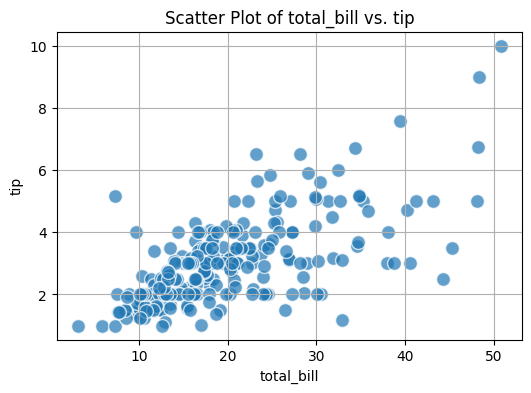

In [9]:
#7) Use seaborn librars to load tips dataset. Find the following from the dataset for the columns total_bill and tip:

data = sns.load_dataset('tips')
df = data[['total_bill','tip']]

#Write a Python function that calculates their skewness.
def calculate_skewness(data):
    return stats.skew(data)

print("Skewness of the data:", calculate_skewness(df))

print("  ")

#Create a program that determines whether the columns exhibit positive skewness, negative skewness, or is approximately symmetric.
def determine_skewness(data):
    skewness_value = calculate_skewness(data)
    
    if skewness_value > 0.5:
        return 'Positive skewness'
    elif skewness_value < -0.5:
        return 'Negative skewness'
    else:
        return 'Approximately symmetric'
    
skewness_results = {}
for column in df.columns:
    skewness_results[column] = determine_skewness(df[column])

for column, result in skewness_results.items():
    print(f"{column}: {result}")
print(" ")

#Write a function that calculates the covariance between two columns.
def calculate_covariance(column1, column2):
    if len(column1) != len(column2):
        raise ValueError("The columns must have the same length.")

    mean1 = np.mean(column1)
    mean2 = np.mean(column2)
    
    covariance = np.mean((column1 - mean1) * (column2 - mean2))
    
    return covariance

print("covariance between two columns :",calculate_covariance(df['total_bill'],df['tip']))
print(" ")

#Implement a Python program that calculates the Pearson correlation coefficient between two columns.
def calculate_pearson_correlation(column1, column2):
   
    if len(column1) != len(column2):
        raise ValueError("The columns must have the same length.")

    mean1 = np.mean(column1)
    mean2 = np.mean(column2)
    
    covariance = np.mean((column1 - mean1) * (column2 - mean2))
    
    std_dev1 = np.std(column1, ddof=0)
    std_dev2 = np.std(column2, ddof=0)
    
    pearson_correlation = covariance / (std_dev1 * std_dev2)
    
    return pearson_correlation

print("Pearson correlation coefficient between Column1 and Column2:", calculate_pearson_correlation(df['total_bill'], df['tip']))
print(" ")

#Write a script to visualize the correlation between two specific columns in a Pandas DataFrame using scatter plots.
def plot_correlation_scatter(df, column1, column2):
    x = df[column1]
    y = df[column2]
    
    # Create the scatter plot
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, alpha=0.7, edgecolors='w', s=100)
    plt.title(f'Scatter Plot of {column1} vs. {column2}')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.grid(True)
    plt.show()
    
plot_correlation_scatter(df, 'total_bill', 'tip')

In [10]:
#8) Write a Python function to calculate the probability density function (PDF) of a continuous random variable for a given normal distribution.

from scipy.stats import norm

def calculate_pdf(x, mean, std_dev):
    pdf_value = norm.pdf(x, loc=mean, scale=std_dev)
    
    return pdf_value

mean = 5  
std_dev = 10  
x = 10  

pdf_value = calculate_pdf(x, mean, std_dev)
print(f"The PDF value at x = {x} for a normal distribution with mean {mean} and std_dev {std_dev} is: {pdf_value}")

The PDF value at x = 10 for a normal distribution with mean 5 and std_dev 10 is: 0.03520653267642995


In [11]:
#9) Create a program to calculate the cumulative distribution function (CDF) of exponential distribution.

from scipy.stats import expon

def calculate_exponential_cdf(x, rate):
    scale = 1 / rate
    cdf_value = expon.cdf(x, scale=scale)
    
    return cdf_value

rate = 1.5  
x = 2  

cdf_value = calculate_exponential_cdf(x, rate)
print(f"The CDF value at x = {x} for an exponential distribution with rate {rate} is: {cdf_value}")


The CDF value at x = 2 for an exponential distribution with rate 1.5 is: 0.950212931632136


In [12]:
#10) Write a Python function to calculate the probability mass function (PMF) of Poisson distribution.

from scipy.stats import poisson

def calculate_poisson_pmf(k, rate):
    
    pmf_value = poisson.pmf(k, rate)
    
    return pmf_value

rate = 3  # Average rate (lambda) of occurrences
k = 5  # Number of occurrences

pmf_value = calculate_poisson_pmf(k, rate)
print(f"The PMF value at k = {k} for a Poisson distribution with rate {rate} is: {pmf_value}")


The PMF value at k = 5 for a Poisson distribution with rate 3 is: 0.10081881344492458


In [13]:
"""11) A company wants to test iN a new website layout leads to a higher conversion rate (percentage oN visitors 
who make a purchase). They collect data Nrom the old and new layouts to compare."""
#Apply z-test to find which layout is successful.

from statsmodels.stats.proportion import proportions_ztest

old_layout = np.array([1] * 50 + [0] * 950) 
new_layout = np.array([1] * 70 + [0] * 930)

conversions_old = np.sum(old_layout)
conversions_new = np.sum(new_layout)
n_old = len(old_layout)
n_new = len(new_layout)

count = np.array([conversions_old, conversions_new])
nobs = np.array([n_old, n_new])
z_stat, p_value = proportions_ztest(count, nobs, alternative='larger')

print(f"Z-statistic: {z_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Conclusion based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The new layout leads to a higher conversion rate.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to say the new layout leads to a higher conversion rate.")

Z-statistic: -1.88
P-value: 0.9702
Fail to reject the null hypothesis: There is not enough evidence to say the new layout leads to a higher conversion rate.


In [22]:
"""12) A tutoring service claims that its program improves students exam scores. A sample oN students who 
participated in the program was taken, and their scores before and aNter the program were recorded."""
#Use z-test to find if the claims made by tutor are true or false.

before_program = np.array([75, 80, 85, 70, 90, 78, 92, 88, 82, 87])
after_program = np.array([80, 85, 90, 80, 92, 80, 95, 90, 85, 88])

differences = after_program - before_program

mean_diff = np.mean(differences)
std_diff = np.std(differences) 
n = len(differences)

se_diff = std_diff / np.sqrt(n)

z_stat = mean_diff / se_diff
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The improved students exam scores.")
else:
    print("Fail to reject the null hypothesis: There is not improved students exam scores.")

Reject the null hypothesis: The improved students exam scores.


In [23]:
"""13) A pharmaceutical company wants to determine if a new drug is effective in reducing blood pressure. They 
conduct a study and record blood pressure measurements before and after administering the drug."""
#Implement z-test to find if the drug really works or not.

before_drug = np.array([145, 150, 140, 135, 155, 160, 152, 148, 130, 138])
after_drug = np.array([130, 140, 132, 128, 145, 148, 138, 136, 125, 130])

differences = before_drug - after_drug

mean_diff = np.mean(differences)
std_diff = np.std(differences) 
n = len(differences)

se_diff = std_diff / np.sqrt(n)

z_stat = mean_diff / se_diff
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The drug significantly reduces blood pressure.")
else:
    print("Fail to reject the null hypothesis: There is not drug significantly reduces blood pressure.")

Reject the null hypothesis: The drug significantly reduces blood pressure.


In [26]:
"""14) A customer service department claims that their average response time is less than 5 minutes. A sample 
of recent customer interactions was taken, and the response times were recorded."""
#Implement z-test to find the claims made by customer service department are tru or false.

response_times = np.array([4.3, 3.8, 5.1, 4.9, 4.7, 4.2, 5.2, 4.5, 4.6, 4.4])

mu = 5  
alpha = 0.05  

sample_mean = np.mean(response_times)
sample_std = np.std(response_times) 
n = len(response_times)

se = sample_std / np.sqrt(n)

z_stat = (sample_mean - mu) / se
p_value = stats.norm.cdf(z_stat)  

if p_value < alpha:
    print("Reject the null hypothesis: The customer service department claims made by <5 minutes are tru.")
else:
    print("Fail to reject the null hypothesis: There is not claim that the average response time is less than 5 minutes.")

Reject the null hypothesis: The customer service department claims made by <5 minutes are tru.
